In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

!pip install colorama

import warnings
warnings.filterwarnings('ignore')

In [17]:
plt.style.use('seaborn')
from colorama import Style, Fore, Back

In [48]:
data=pd.read_csv("dementia_dataset.csv")

In [49]:
data.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


# **Exploratory Data Analysis**

In [50]:
# Renaming the variables to something that convey meaning
data.rename(columns={'M/F':'Gender','MR Delay':'MR_Delay', 'Hand':'Handedness', 'EDUC':'Years_of_Edu',
         'SES':'Socioeconomic_Status', 'MMSE':'Mini_Mental_State_Exam',
         'CDR':'Clinical_Dementia_Rating', 'eTIV':'Estimated_total_intracranial_volume',
        'nWBV':'Normalized_whole_brain_volume', 'ASF':'Atlas_scaling_factor'}, 
      inplace=True)

# https://www.kaggle.com/sid321axn/eda-for-predicting-dementia

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Subject ID                           373 non-null    object 
 1   MRI ID                               373 non-null    object 
 2   Group                                373 non-null    object 
 3   Visit                                373 non-null    int64  
 4   MR_Delay                             373 non-null    int64  
 5   Gender                               373 non-null    object 
 6   Handedness                           373 non-null    object 
 7   Age                                  373 non-null    int64  
 8   Years_of_Edu                         373 non-null    int64  
 9   Socioeconomic_Status                 354 non-null    float64
 10  Mini_Mental_State_Exam               371 non-null    float64
 11  Clinical_Dementia_Rating        

**INFERENCE** 

There are 373 observations and 15 columns

Two columns have missing values

There are object, float and integer data types

In [52]:
# Summary stats for the numerical columns
data.describe()

,Visit,MR_Delay,Age,Years_of_Edu,Socioeconomic_Status,Mini_Mental_State_Exam,Clinical_Dementia_Rating,Estimated_total_intracranial_volume,Normalized_whole_brain_volume,Atlas_scaling_factor
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [9]:
# Summary stats for the categorical columns
data.describe(include=[object])

,Subject ID,MRI ID,Group,Gender,Handedness
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0070,OAS2_0001_MR1,Nondemented,F,R
freq,5,1,190,213,373


## **Checking for missing values**

In [11]:
#Checking for missing values
data.isna().sum()

Subject ID                              0
MRI ID                                  0
Group                                   0
Visit                                   0
MR_Delay                                0
Gender                                  0
Handedness                              0
Age                                     0
Years_of_Edu                            0
Socioeconomic_Status                   19
Mini_Mental_State_Exam                  2
Clinical_Dementia_Rating                0
Estimated_total_intracranial_volume     0
Normalized_whole_brain_volume           0
Atlas_scaling_factor                    0
dtype: int64

In [54]:
# function to display UNIQUE examples of data in each field

def getDesc(data, Column, numExamples=5):
    x = list(set([i for i in data[Column] if i==i]))
    if len(x)<numExamples:
        numExamples = len(x)
    x = list(np.random.choice(x, size=numExamples, replace=False))
    print('Examples in '+Style.BRIGHT+Back.CYAN+Column+Back.RESET+':'+Style.RESET_ALL, x, '\n')
    return None

# ======================================================================================

# function to display the number of missing values in each field

def getNumNan(data, thisFeature):
    ms = data[data[thisFeature] != data[thisFeature]].shape[0]
    print('Missing values in '+Style.BRIGHT+Back.CYAN+thisFeature+Back.RESET+Style.RESET_ALL+': {}'.format(ms))
    return None

In [56]:
for i in data.columns:
    getNumNan(data, i)
    getDesc(data, i, 7)

Missing values in Subject ID: 0
Examples in Subject ID: ['OAS2_0071', 'OAS2_0116', 'OAS2_0067', 'OAS2_0028', 'OAS2_0128', 'OAS2_0043', 'OAS2_0054'] 

Missing values in MRI ID: 0
Examples in MRI ID: ['OAS2_0183_MR1', 'OAS2_0095_MR2', 'OAS2_0147_MR2', 'OAS2_0106_MR1', 'OAS2_0022_MR1', 'OAS2_0044_MR2', 'OAS2_0031_MR3'] 

Missing values in Group: 0
Examples in Group: ['Converted', 'Nondemented', 'Demented'] 

Missing values in Visit: 0
Examples in Visit: [5, 4, 1, 3, 2] 

Missing values in MR_Delay: 0
Examples in MR_Delay: [472, 675, 490, 842, 617, 504, 642] 

Missing values in Gender: 0
Examples in Gender: ['M', 'F'] 

Missing values in Handedness: 0
Examples in Handedness: ['R'] 

Missing values in Age: 0
Examples in Age: [95, 82, 80, 69, 81, 89, 83] 

Missing values in Years_of_Edu: 0
Examples in Years_of_Edu: [13, 11, 8, 14, 18, 23, 15] 

Missing values in Socioeconomic_Status: 19
Examples in Socioeconomic_Status: [4.0, 3.0, 2.0, 5.0, 1.0] 

Missing values in Mini_Mental_State_Exam: 2


Text(0.5, 1.0, 'Histogram of Socioeconomic_Status')

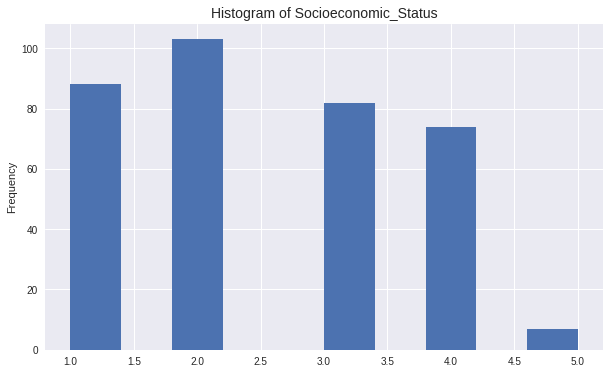

In [57]:
# Imputing missing values in Socioeconomic_Status column and  Mini_Mental_State_Exam columns.

#first let's analyse the Socioeconomic_Status column

fig = plt.figure(figsize = (10,6))
data['Socioeconomic_Status'].plot(kind='hist', grid=True)
plt.title('Histogram of Socioeconomic_Status', fontsize = 14)

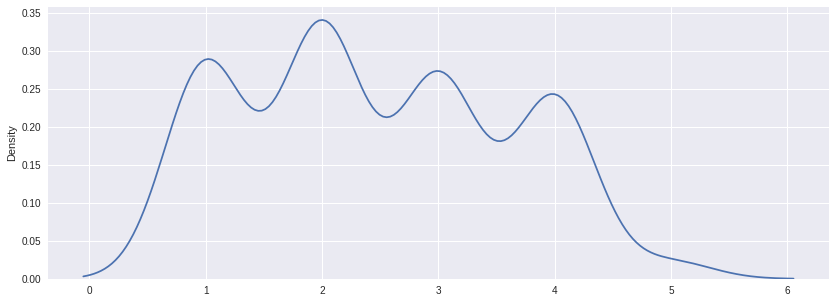

In [58]:
fig = plt.figure(figsize = (14,5))

sns.distplot(data[['Socioeconomic_Status']], hist = False)

**INFERENCE**

Imputing Missing Values in SES with median why? because SES has values of integer type so we cannot impute float value of mean but we can impute median in place as both median and mean have very close values and median in this case is most representative value of SES

In [59]:
data['Socioeconomic_Status'].fillna((data['Socioeconomic_Status'].median()), inplace=True)

Text(0.5, 1.0, 'Histogram of Mini_Mental_State_Exam')

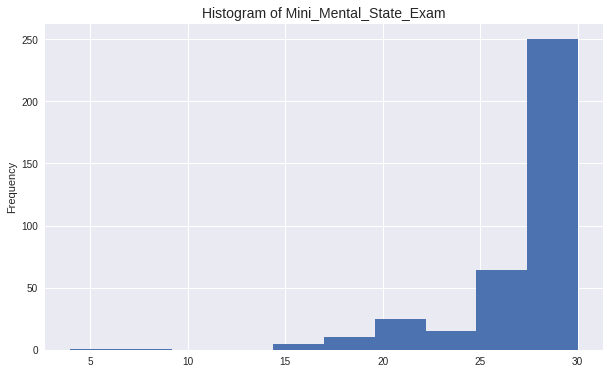

In [60]:
#Analysing the Mini_Mental_State_Exam column

fig = plt.figure(figsize = (10,6))
data['Mini_Mental_State_Exam'].plot(kind='hist', grid=True)
plt.title('Histogram of Mini_Mental_State_Exam', fontsize = 14)

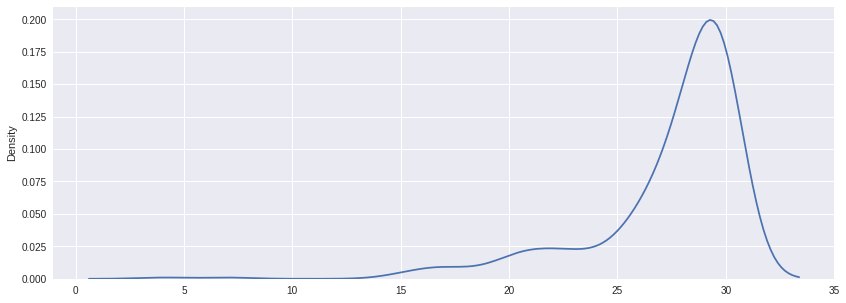

In [61]:
fig = plt.figure(figsize = (14,5))

sns.distplot(data[['Mini_Mental_State_Exam']], hist = False)

In [62]:
#Imputing the missing values with median
#same reason as SES

data['Mini_Mental_State_Exam'].fillna((data['Mini_Mental_State_Exam'].median()), inplace=True)

In [63]:
#Cross-checking for percentage of missing vales

data.isnull().sum()/len(data.index) * 100

Subject ID                             0.0
MRI ID                                 0.0
Group                                  0.0
Visit                                  0.0
MR_Delay                               0.0
Gender                                 0.0
Handedness                             0.0
Age                                    0.0
Years_of_Edu                           0.0
Socioeconomic_Status                   0.0
Mini_Mental_State_Exam                 0.0
Clinical_Dementia_Rating               0.0
Estimated_total_intracranial_volume    0.0
Normalized_whole_brain_volume          0.0
Atlas_scaling_factor                   0.0
dtype: float64

## **Checking for Multicollinearity**

In [64]:
#correlation between all the variables
corr = data.corr()
corr

,Visit,MR_Delay,Age,Years_of_Edu,Socioeconomic_Status,Mini_Mental_State_Exam,Clinical_Dementia_Rating,Estimated_total_intracranial_volume,Normalized_whole_brain_volume,Atlas_scaling_factor
Visit,1.000000,0.920009,0.183213,0.024615,-0.049294,-0.027381,0.002325,0.117428,-0.126682,-0.120399
MR_Delay,0.920009,1.000000,0.205357,0.051630,-0.026247,0.066619,-0.062915,0.119624,-0.105586,-0.123545
Age,0.183213,0.205357,1.000000,-0.027886,-0.045410,0.055255,-0.026257,0.042348,-0.518359,-0.035067
Years_of_Edu,0.024615,0.051630,-0.027886,1.000000,-0.691222,0.192158,-0.153121,0.257015,-0.012200,-0.241752
Socioeconomic_Status,-0.049294,-0.026247,-0.045410,-0.691222,1.000000,-0.139943,0.052313,-0.249030,0.092361,0.240831
Mini_Mental_State_Exam,-0.027381,0.066619,0.055255,0.192158,-0.139943,1.000000,-0.674876,-0.036234,0.342189,0.044960
Clinical_Dementia_Rating,0.002325,-0.062915,-0.026257,-0.153121,0.052313,-0.674876,1.000000,0.022819,-0.344819,-0.029340
Estimated_total_intracranial_volume,0.117428,0.119624,0.042348,0.257015,-0.249030,-0.036234,0.022819,1.000000,-0.210122,-0.988877
Normalized_whole_brain_volume,-0.126682,-0.105586,-0.518359,-0.012200,0.092361,0.342189,-0.344819,-0.210122,1.000000,0.213476
Atlas_scaling_factor,-0.120399,-0.123545,-0.035067,-0.241752,0.240831,0.044960,-0.029340,-0.988877,0.213476,1.000000


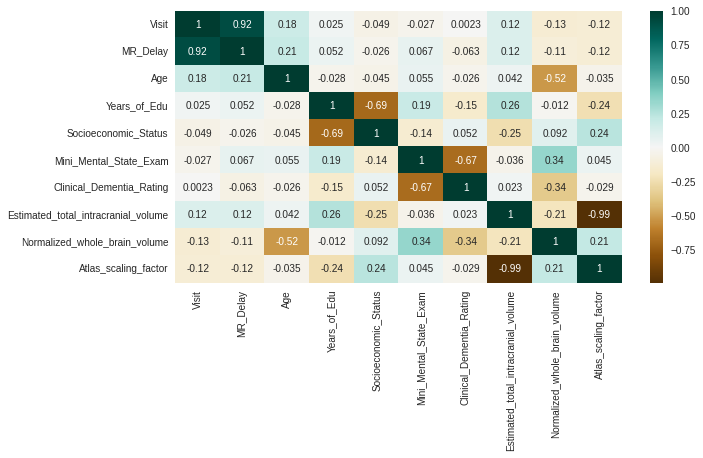

In [65]:
plt.figure(figsize = (10, 5))
sns.heatmap(corr,cmap ='BrBG', annot = True)

**INFERENCE**

-->visit and MR Delay are highly correlated

-->ASF and eTIV are also highly -ve correlated


-->Can be looked into during modelling

## **Univariate analysis**

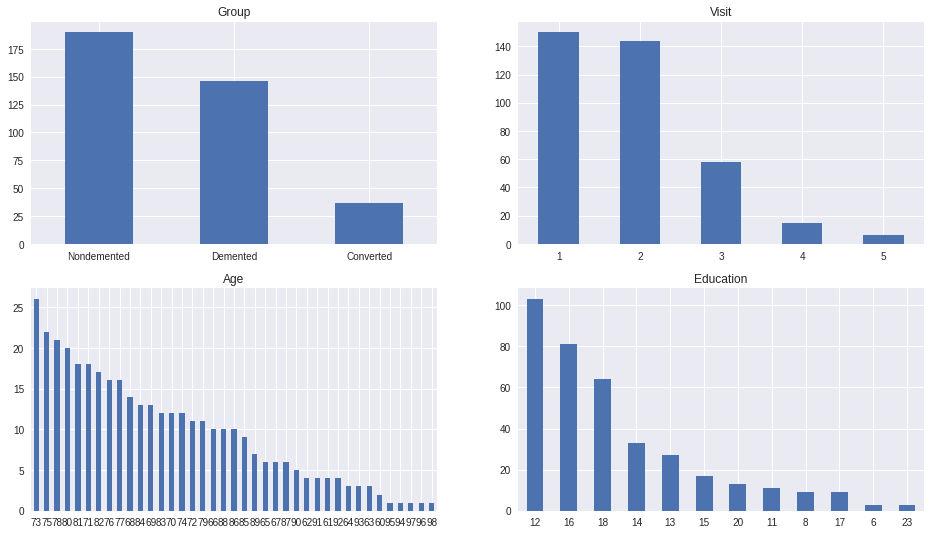

In [66]:
#starting with univariate analysis
plt.subplot(221)
data['Group'].value_counts().plot(kind='bar',title='Group',figsize=(16,9))
plt.xticks(rotation=0)
plt.subplot(222)
data['Visit'].value_counts().plot(kind='bar',title='Visit')
plt.xticks(rotation=0)
plt.subplot(223)
data['Age'].value_counts().plot(kind='bar',title='Age')
plt.xticks(rotation=0)
plt.subplot(224)
data['Years_of_Edu'].value_counts().plot(kind='bar',title='Education')
plt.xticks(rotation=0)

plt.show()

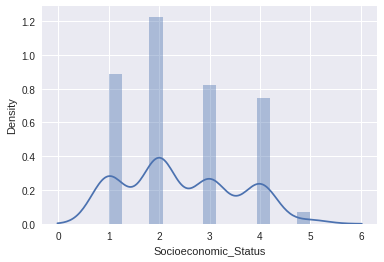

In [67]:
import seaborn as sns
sns.distplot(data['Socioeconomic_Status'])

**INFERENCE**

Here we see that majority of them has socioeconomic status less than average.

### Analysing Age

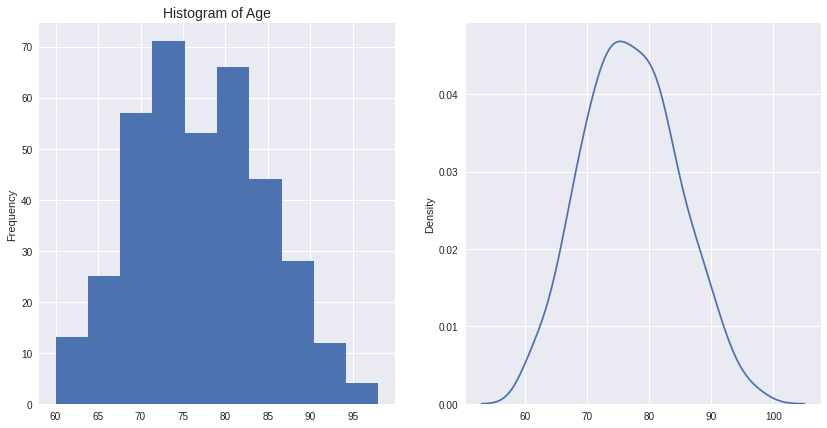

In [78]:
plt.figure(figsize=(14,7))
plt.subplot(121)
data['Age'].plot(kind='hist', grid=True)
plt.title('Histogram of Age', fontsize = 14)

plt.subplot(122)
sns.distplot(data[['Age']], hist = False)

## **Bivariate Analysis**

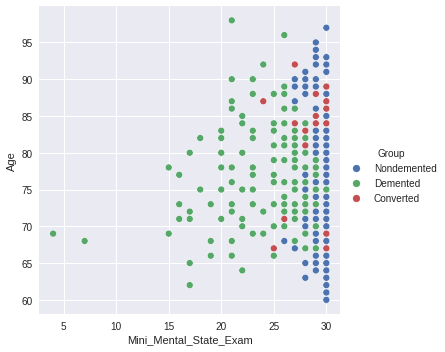

In [68]:
sns.relplot(x='Mini_Mental_State_Exam',y='Age',hue='Group',data=data)

**INFERENCE**

We can see that most of the non demented individuals have high MMSE score across all ages hence,a good mental state

Also, we have more demented individuals within the age of 75 -85,and their dementia is mild (since MMSE score is within 20-25 here)

###DISSCUSSION ABOUT TARGET VARIABLE

Analysing the 'Group' and CDR Column, and choosing which is best as the Target Variable
From the Group Column:

Demented : Subjects that were tagged as Demented at the start of the Study and remained so till the end of the study
Undemented : Subjects that were tagged as Undemented at the start of the Study and remained so till the end of the study
Converted : Subjects that were tagged as Undemented at the Start of the study, but as the study progressed were tgged as Demented

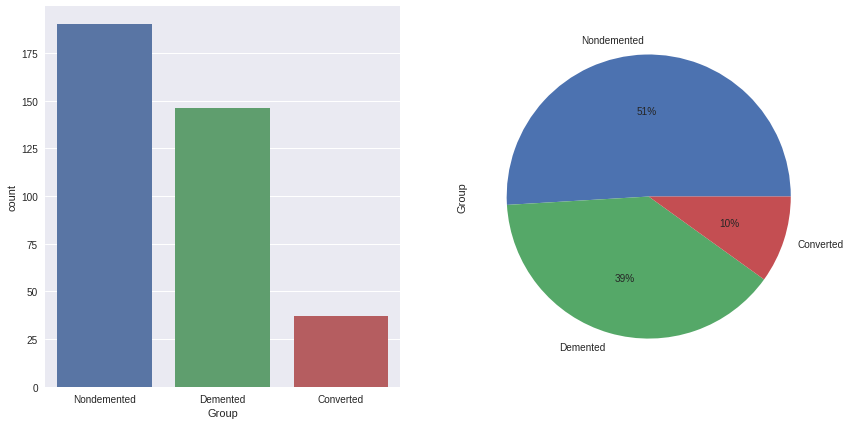

In [69]:
#Visualizing the Group column

plt.figure(figsize=(14,7))
plt.subplot(121)
label = data['Group'].unique().tolist()
sns.countplot(data['Group'])

plt.subplot(122)
data['Group'].value_counts().plot.pie(autopct = "%1.0f%%", labels=label)

**INFERENCE**

As the Converted Group, appears somewhat Obscured, lets further probe into it

In [70]:
data.loc[data['Group'] == 'Converted']

,Subject ID,MRI ID,Group,Visit,MR_Delay,Gender,Handedness,Age,Years_of_Edu,Socioeconomic_Status,Mini_Mental_State_Exam,Clinical_Dementia_Rating,Estimated_total_intracranial_volume,Normalized_whole_brain_volume,Atlas_scaling_factor
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,R,91,12,3.0,28.0,0.5,1463,0.696,1.199
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,F,R,71,16,1.0,27.0,0.0,1289,0.771,1.362


**INFERENCE**

I personally,won't advice we make the Group column our Target column as I feel the algorithm might have a hard time predicting which data point is Converted as I believe having the Subject ID is important to make such distinction. 'Converted' means the subject was initially non demented during the start of the study, but became demented along the way, hence predicting what particular data point is Converted is dependent on the progression of that particular subject throughout the study which can only be monitored by the Subject ID

And Since the subject Id will be removed from the dataset, I think we should use the CDR column as our Target column

Analysing the CDR Column

CDR stands for Clinical Dementia Rating

The CDR Scoring Table provides descriptive anchors that guide the clinician in making appropriate ratings based on interview data and clinical judgment. In addition to ratings for each domain, an overall CDR™ score may be calculated through the use of an CDR™ Scoring Algorithm. This score is useful for characterizing and tracking a patient’s level of impairment/dementia:

0 = Normal
0.5 = Very Mild Dementia or Questionable
1 = Mild Dementia
2 = Moderate Dementia
3 = Severe Dementia

In [71]:
data['Clinical_Dementia_Rating'].unique()

array([0. , 0.5, 1. , 2. ])

**INFERENCE**

From the Above, one can observed that except Normal score all other score including 0.5 have dementia symptoms because it is very crucial to detect dementia in early stages.

Hence One can group the cases having 0 score as Normal and all other score >= 0.5 as dementia


Secondly, to further support why the Group column shouldn't be our target variable, but rather the CDR column,

The description of CDR and Group seem to be measuring the same thing. CDR measures the degree of dementia while Group classifies if a person has dementia or not.

So, to eliminate bias:

If either of the two is the target variable, the other must not be part of the features

In [73]:
#Visualizing the relationship between Group and CDR

df= data.groupby(['Group', 'Clinical_Dementia_Rating'])['Group'].count().unstack('Clinical_Dementia_Rating')

In [74]:
df

Clinical_Dementia_Rating,0.0,0.5,1.0,2.0
Group,,,,
Converted,18.0,19.0,NaN,NaN
Demented,NaN,102.0,41.0,3.0
Nondemented,188.0,2.0,NaN,NaN


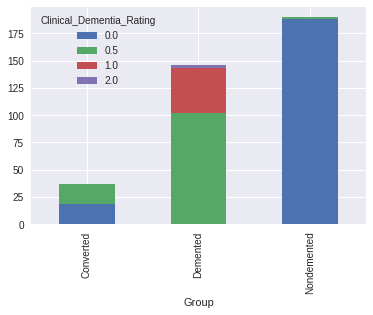

In [75]:
df.plot(kind='bar', stacked = True)

**INFERENCE**

from the Table and Visualization

All Demented Subjects have a CDR value of 0.5, 1.0 and 2.0 which is in line with the clinical definition of those CDR values
188 out 0f 190 Non-demented subjects have CDR value of 0!
Just 2 Non-demented subject have a CDR value of 0.5, which truly is inconsistent and confusing as a CDR of 0.5 is a clinical indicaion of Very mild dementia (More reason why we should use CDR as our Target variable and Not have both in the Dataset)
Conclusions:

Group column should be removed whilst developing the features
CDR column should be grouped, the cases having 0 score as Normal and all other score >= 0.5 as dementia
CDR should be Used as the Target column

In [81]:
# Categorizing the CDR column

def cat_CDR(n):
    if n == 0:
        return 'Normal'

    elif n == 0.5 or n==1 :
        return 'Mild'    
    

    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Moderate'


data['Cat_CDR'] = data['Clinical_Dementia_Rating'].apply(lambda x: cat_CDR(x))

In [82]:
data.head()


,Subject ID,MRI ID,Group,Visit,MR_Delay,Gender,Handedness,Age,Years_of_Edu,Socioeconomic_Status,Mini_Mental_State_Exam,Clinical_Dementia_Rating,Estimated_total_intracranial_volume,Normalized_whole_brain_volume,Atlas_scaling_factor,Age_group,Cat_CDR
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,80-90,Normal
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,80-90,Normal
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,70-80,Mild
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010,70-80,Mild
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034,70-80,Mild


Analysing MMSE

About MMSE (Mini Mental State Examination)

A practical method for grading the cognitive state of patients for the clinician study. The MMSE was designed as a screening test for the purpose of evaluating cognitive impairment in older adults. It is a 30-point questionnaire that is used extensively in clinical and research settings to measure cognitive impairment.

Interpretations: Any score of 24 or more (out of 30) indicates a normal cognition. Below this, scores can indicate severe (≤9 points), moderate (10–18 points) or mild (19–23 points) cognitive impairment.That is, even a maximum score of 30 points can never rule out dementia. Low to very low scores correlate closely with the presence of dementia, although other mental disorders can also lead to abnormal findings on MMSE testing.

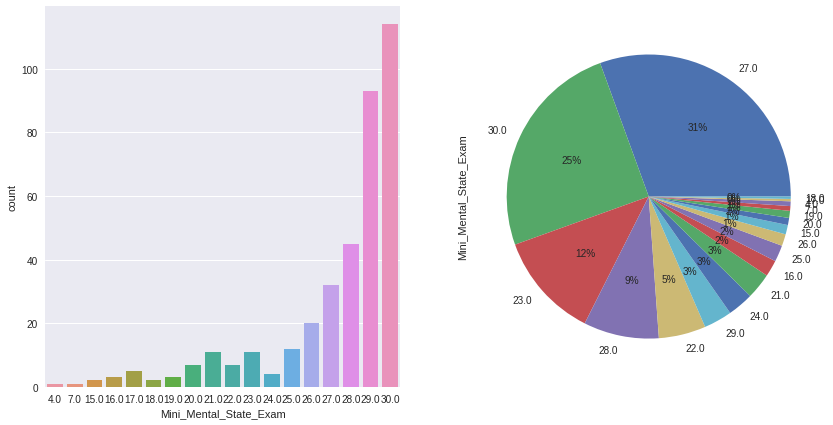

In [76]:
plt.figure(figsize=(14,7))
plt.subplot(121)
sns.countplot(data['Mini_Mental_State_Exam']) 

plt.subplot(122)
label = data['Mini_Mental_State_Exam'].unique().tolist()
data['Mini_Mental_State_Exam'].value_counts().plot.pie(autopct = "%1.0f%%", labels=label)

In [83]:
#From the definition of the MMSE Feature, let's categorize it

def cat_MMSE(n):
    if n >= 24:
        return 'Normal'
    elif n <= 9: 
        return 'Severe'
    elif n >= 10 and n <= 18:
        return 'Moderate'
    elif n >= 19 and n <= 23:
        return 'Mild'


data['Cat_MMSE'] = data['Mini_Mental_State_Exam'].apply(lambda x: cat_MMSE(x))

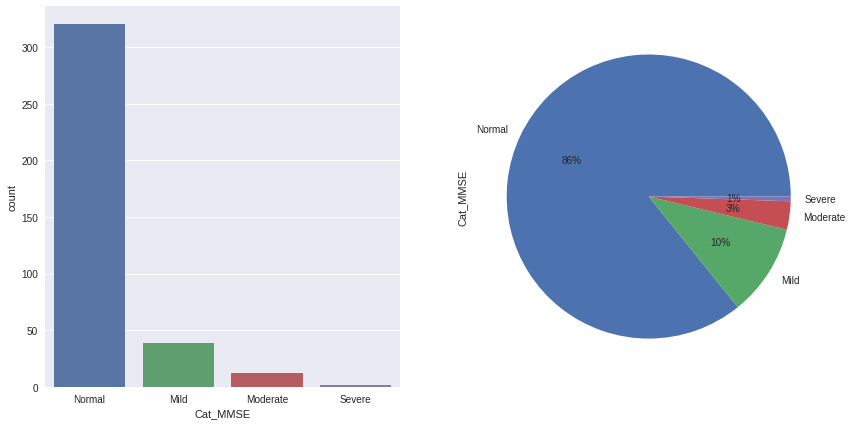

In [84]:
plt.figure(figsize=(14,7))
plt.subplot(121)
sns.countplot(data['Cat_MMSE'])

plt.subplot(122)
label = data['Cat_MMSE'].unique().tolist()
data['Cat_MMSE'].value_counts().plot.pie(autopct = "%1.0f%%", labels=label)

In [85]:
# A function that makes comparison plot between Cat_CDR and other categorical variables

def cat_comparison_plot(cat):
    fig = plt.figure(figsize=(18,12))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    
    
    
    df = data.groupby([cat, 'Cat_CDR'])[cat].count().unstack('Cat_CDR')
    df.plot(kind='bar', stacked = True, ax = ax2)
    result = data.groupby(cat).apply (lambda group: (group.Cat_CDR == 'Normal').sum() / float(group.Cat_CDR.count())).to_frame('Normal')
    result['Dementia'] = 1 - result.Normal
    result.plot(kind='bar', stacked = True, ax = ax1, grid=True)
    
    plt.show()

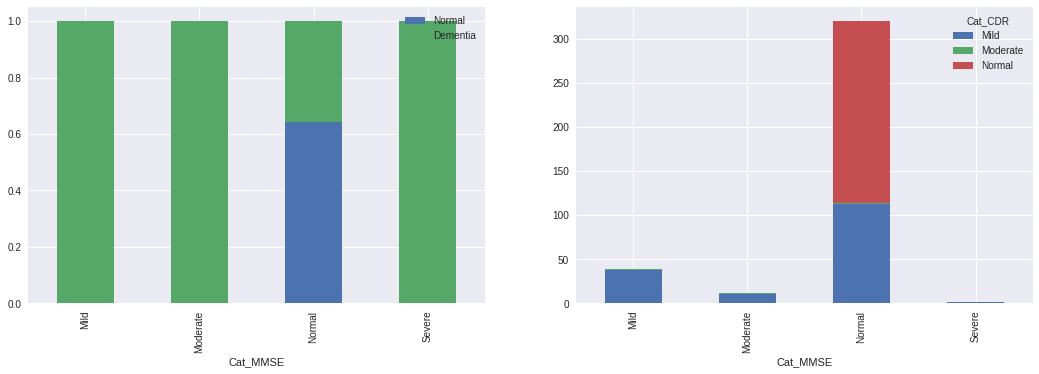

In [86]:
cat_comparison_plot('Cat_MMSE')

**INFERENCE**

From the Above Plot,

100% of all Mild, Moderate and Severe Cat_MMSE cases are Demented

About 40% of the Normal Cat_MMSE cases are Demented

## Analysising features with cat_CDR

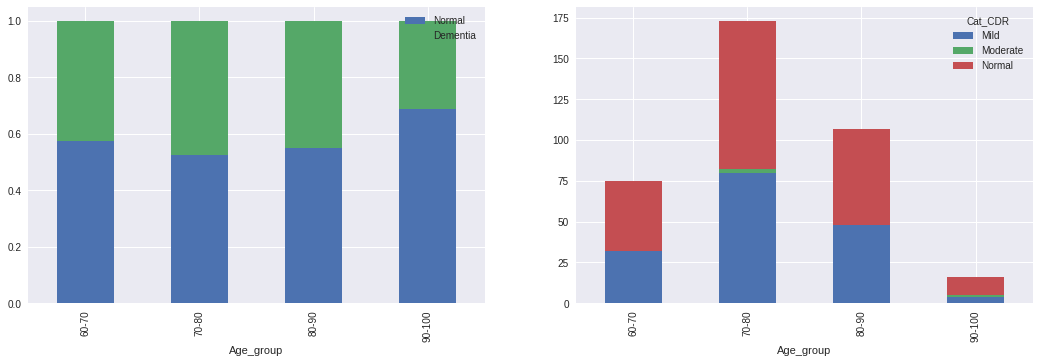

In [87]:
cat_comparison_plot('Age_group')

**INFERENCE**

From the plot, majority of the Dementia cases are in age group 70-80 years

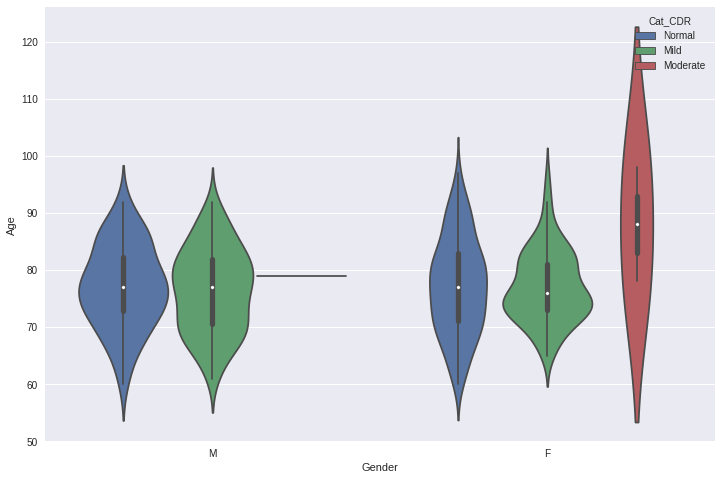

In [89]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Gender", y="Age",hue="Cat_CDR", data=data)
plt.show()

**INFERENCE**

From the Above Plot:

In Males, number of demntia cases peaks around 80 years while in females demntia is prevlent around 75 years of age
Male dementia starts early, before 60 years, but female dementia starts generally after 60 years

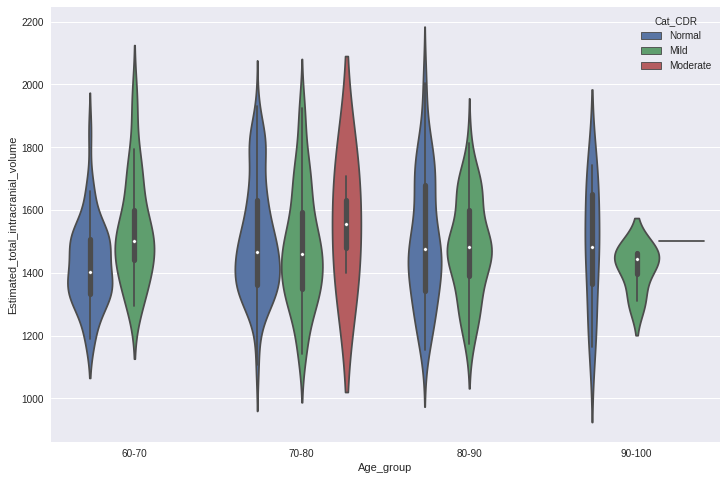

In [91]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Age_group", y="Estimated_total_intracranial_volume",hue="Cat_CDR", data=data)
plt.show()

**INFERENCE**

Intracranial volume (ICV) is an important normalization measure used in morphometric analyses to correct for head size in studies of Alzheimer Disease (AD).The ICV measure, sometimes referred to as total intracranial volume (TIV), refers to the estimated volume of the cranial cavity as outlined by the supratentorial dura matter or cerebral contour when dura is not clearly detectable. ICV is often used in studies involved with analysis of the cerebral structure under different imaging modalities, such as Magnetic Resonance (MR).

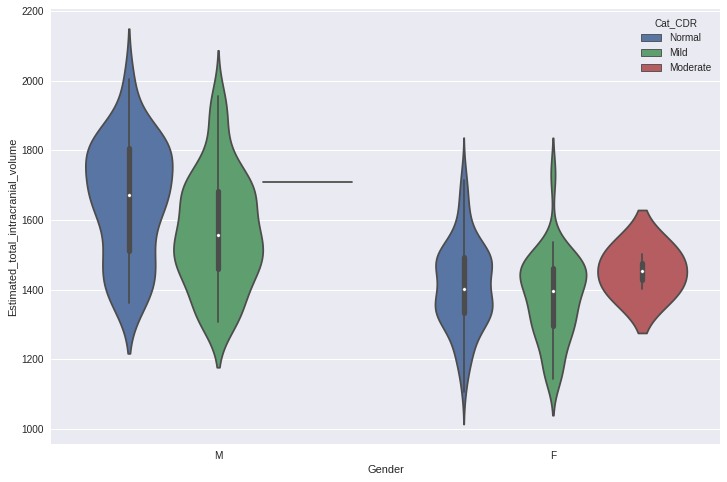

In [94]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Gender", y="Estimated_total_intracranial_volume",hue="Cat_CDR", data=data)
plt.show()

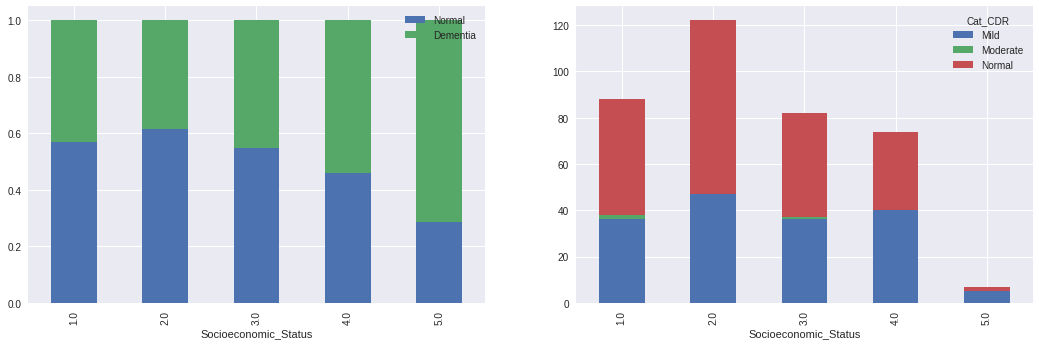

In [96]:
cat_comparison_plot('Socioeconomic_Status')

**INFERENCE**

From the plot above:

Highest probability of dementia occured at the lowest level of socio economic status.. which makes sense

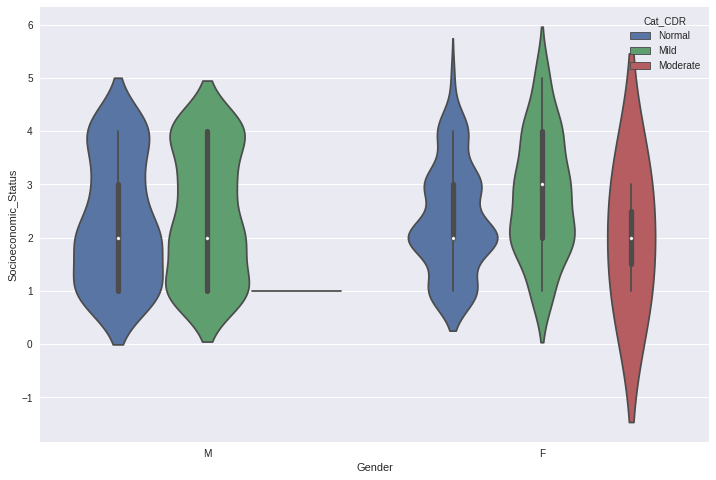

In [97]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Gender", y="Socioeconomic_Status",hue="Cat_CDR", data=data)
plt.show()

**INFERENCE**

From the Above:

In Males, the two peaks of dementia occurs at 1(Highest status), and 4(Lower status)
In Females, highest peak is at 2, and there are slightly less demnetia cases at 1 and 5

SES - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status

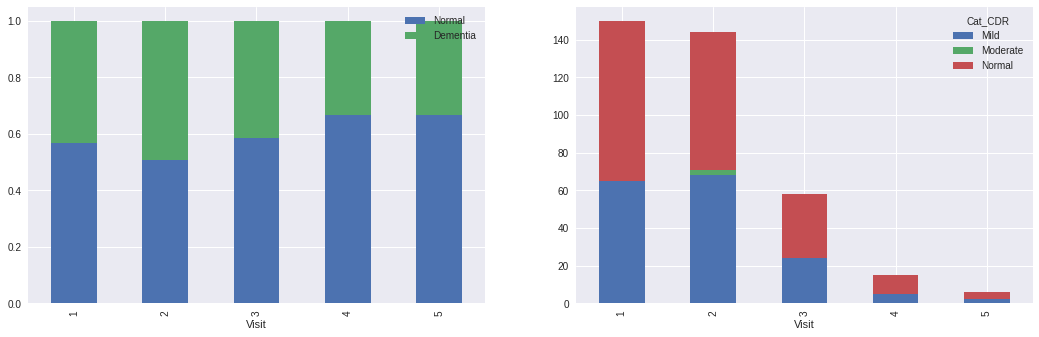

In [98]:
cat_comparison_plot('Visit')

**INFERENCE**

From the above plot

Subject on their 2nd Visits have the most cases of Dementia
Comparing Visit and Cat_MMSE

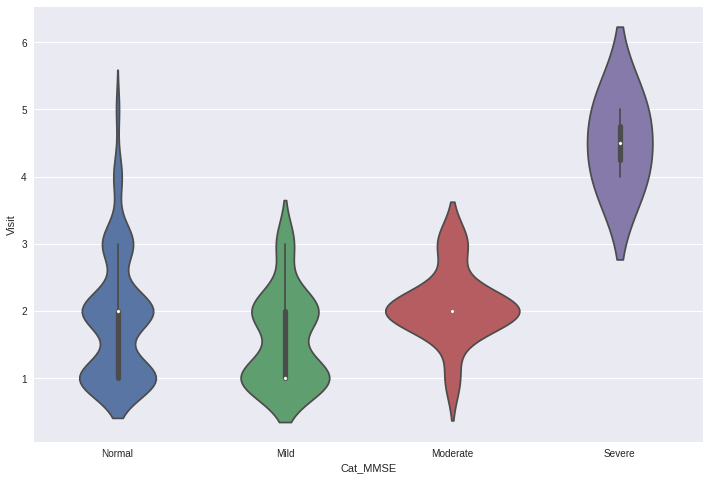

In [100]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Cat_MMSE", y="Visit",split=True,
                    data=data)
plt.show()

**INFERENCE**

From the above plot

Severe case of Cognitive Impairment starts reporting as the number of visits increased to more than 3